In [1]:
import librosa
import librosa.display
import IPython.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

import tensorflow as tf

import nengo
from nengo.utils.matplotlib import rasterplot
from nengo.dists import Choice
from nengo.utils.ensemble import tuning_curves

import hgtk
 
%matplotlib inline
 
audio_path = '4_3273.wav'


In [2]:
yt, sr = librosa.load(audio_path)
y, index = librosa.effects.trim(yt, top_db=20)


In [3]:
IPython.display.Audio(data=y, rate=sr)

In [4]:
total_cho = hgtk.josa.CHO
total_joong = hgtk.josa.JOONG
total_jong = hgtk.josa.JONG
print(total_cho)
print(total_joong)
print(total_jong)


('ㄱ', 'ㄲ', 'ㄴ', 'ㄷ', 'ㄸ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅃ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅉ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ')
('ㅏ', 'ㅐ', 'ㅑ', 'ㅒ', 'ㅓ', 'ㅔ', 'ㅕ', 'ㅖ', 'ㅗ', 'ㅘ', 'ㅙ', 'ㅚ', 'ㅛ', 'ㅜ', 'ㅝ', 'ㅞ', 'ㅟ', 'ㅠ', 'ㅡ', 'ㅢ', 'ㅣ')
('', 'ㄱ', 'ㄲ', 'ㄳ', 'ㄴ', 'ㄵ', 'ㄶ', 'ㄷ', 'ㄹ', 'ㄺ', 'ㄻ', 'ㄼ', 'ㄽ', 'ㄾ', 'ㄿ', 'ㅀ', 'ㅁ', 'ㅂ', 'ㅄ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ')


In [5]:
ori_sent = '저희 가게의 손님은 주로 외국인이에요'
import hgtk
 
jamo_sent = hgtk.text.decompose(ori_sent)
jamo_sent = jamo_sent.replace('ᴥ', '')
print(jamo_sent + '\n')

many_hot = np.zeros(len(total_cho + total_joong + total_jong))
sent_hot = np.zeros((len(ori_sent),len(many_hot)))
word_idx = 0

for word in ori_sent:
    #print("input_word: " + str(word))
    if(hgtk.checker.is_hangul(word)):
        split_word = hgtk.letter.decompose(word)
        cho_idx = 0
        joong_idx = 0
        jong_idx = 0
        one_hot_cho = np.zeros(len(hgtk.josa.CHO))
        one_hot_joong = np.zeros(len(hgtk.josa.JOONG))
        one_hot_jong = np.zeros(len(hgtk.josa.JONG))
        if(len(split_word) > 2):
            for cho in total_cho:
                if(cho == split_word[0]):
                    one_hot_cho[cho_idx] = 1
                    break
                else:
                    cho_idx+= 1
            for joong in total_joong:
                if(joong == split_word[1]):
                    one_hot_joong[joong_idx] = 1
                    break
                else:
                    joong_idx+= 1
            for jong in total_jong:
                if(jong == split_word[2]):
                    one_hot_jong[jong_idx] = 1
                    break
                else:
                    jong_idx+= 1
        else:
            for cho in total_cho:
                if(cho == split_word[0]):
                    one_hot_cho[cho_idx] = 1
                    break
                else:
                    cho_idx+= 1
            for joong in total_joong:
                if(joong == split_word[1]):
                    one_hot_joong[joong_idx] = 1
                    break
                else:
                    joong_idx+= 1
        many_hot = np.append(one_hot_cho, one_hot_joong)
        many_hot = np.append(many_hot, one_hot_jong)
        
    else:
        many_hot = np.zeros(len(total_cho + total_joong + total_jong))
    sent_hot[word_idx] = many_hot
    word_idx += 1


print(sent_hot)
print(len(sent_hot))
print(len(ori_sent))
print(len(sent_hot[0]))
print(sent_hot[0])

ㅈㅓㅎㅢ ㄱㅏㄱㅔㅇㅢ ㅅㅗㄴㄴㅣㅁㅇㅡㄴ ㅈㅜㄹㅗ ㅇㅚㄱㅜㄱㅇㅣㄴㅇㅣㅇㅔㅇㅛ

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
20
20
68
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


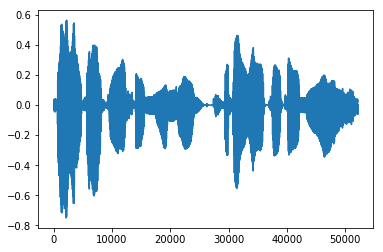

In [6]:
plt.figure()
plt.plot(y)

In [7]:
time_duration = int(librosa.get_duration(y=y, sr=sr) * 1000)
data_length = y.shape[0]
print("time duration: " + str(time_duration) + " ms")
print("sampling rate: " + str(sr))
print("data length: " + str(data_length))

time duration: 2368 ms
sampling rate: 22050
data length: 52224


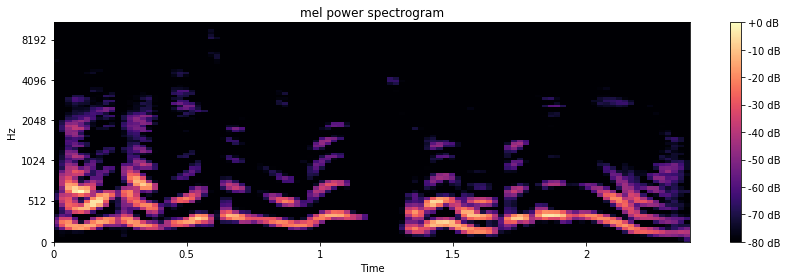

In [11]:
nMels = 80
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=nMels) 
 
log_S = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()
plt.show()


In [13]:
def half_normalize(S):
    return (S - S.min()/2) / (-S.min()/2)

def simple_normalize(S):
    return (S - S.min()) / (-S.min())

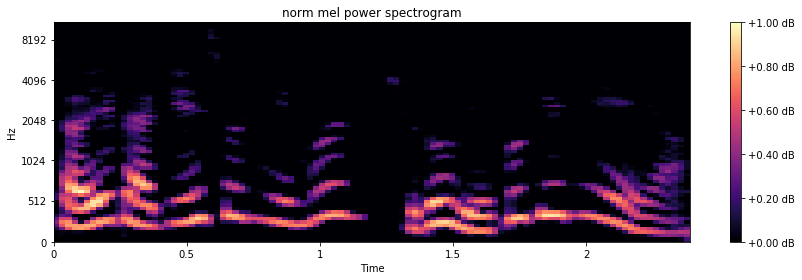

In [14]:
#norm_S = half_normalize(log_S)
norm_S = simple_normalize(log_S)
 
plt.figure(figsize=(12, 4))
librosa.display.specshow(norm_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('norm mel power spectrogram')
plt.colorbar(format='%+0.2f dB')
plt.tight_layout()
plt.show()

In [15]:
transposed_norm_S = norm_S.transpose()
frame_size = int(time_duration/transposed_norm_S.shape[0])+1

print(transposed_norm_S.shape)
print(transposed_norm_S)

(103, 80)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.02279189 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.36828152 ... 0.         0.         0.        ]
 [0.00152067 0.05413733 0.33235669 ... 0.         0.         0.        ]
 [0.15063812 0.20236502 0.38774793 ... 0.         0.         0.        ]]


In [16]:
def voice_input(t):
    ms = int(t * 1000)
    frame_num = int(ms / frame_size)
    voice = transposed_norm_S[frame_num]
    return voice

In [17]:
def answer_input(t):
    ms = int(t * 1000)
    #ms = t
    char_num = int(ms/(time_duration / len(ori_sent))-1)
    voice = sent_hot[char_num]
    return voice

In [61]:
neuron_number = 80
hidden_neuron_number = 200
hidden_neuron_number2 = 200
hidden_neuron_number3 = 68
output_neuron_number = 68

answer_neuron_number = 68
error_neuron_number = 68

with nengo.Network() as net:
    voice = nengo.Node(output=voice_input)
    answer = nengo.Node(output=answer_input)
    
    inputNeuron = nengo.Ensemble(neuron_number, dimensions=neuron_number, max_rates=([100] * neuron_number))
    #inputNeuron.encoders = Choice([[1] * neuron_number])
    hiddenNeuron = nengo.Ensemble(hidden_neuron_number, dimensions=hidden_neuron_number, max_rates=([100] * hidden_neuron_number), intercepts=([0.25] * hidden_neuron_number))
    #hiddenNeuron.encoders = Choice([[1] * hidden_neuron_number])
    hiddenNeuron2 = nengo.Ensemble(hidden_neuron_number2, dimensions=hidden_neuron_number2, max_rates=([100] * hidden_neuron_number2), intercepts=([0.25] * hidden_neuron_number2))
    #hiddenNeuron2.encoders = Choice([[1] * hidden_neuron_number2])
    hiddenNeuron3 = nengo.Ensemble(hidden_neuron_number3, dimensions=hidden_neuron_number3, max_rates=([100] * hidden_neuron_number3), intercepts=([0.25] * hidden_neuron_number3))
    #hiddenNeuron3.encoders = Choice([[1] * hidden_neuron_number3])
    
    outputNeuron = nengo.Ensemble(output_neuron_number, dimensions=output_neuron_number, max_rates=([100] * output_neuron_number), intercepts=([0.25] * output_neuron_number))
    #outputNeuron.encoders = Choice([[1] * output_neuron_number])
    
    error = nengo.Ensemble(output_neuron_number, dimensions=output_neuron_number, max_rates=([100] * output_neuron_number))
    #error.encoders = Choice([[1] * output_neuron_number])
    
    answerNeuron = nengo.Ensemble(answer_neuron_number, dimensions=answer_neuron_number, max_rates=([100] * answer_neuron_number), intercepts=([0] * answer_neuron_number))
    #answerNeuron.encoders = Choice([[1] * answer_neuron_number])
    
    weights = np.random.normal(size=(hiddenNeuron.n_neurons, inputNeuron.n_neurons))
    weights2 = np.random.normal(size=(hiddenNeuron2.n_neurons, hiddenNeuron.n_neurons))
    weights3 = np.random.normal(size=(hiddenNeuron3.n_neurons, hiddenNeuron2.n_neurons))
    weights4 = np.random.normal(size=(outputNeuron.n_neurons, hiddenNeuron3.n_neurons))
    
    nengo.Connection(voice, inputNeuron.neurons, synapse=0.01)
    nengo.Connection(answer, answerNeuron.neurons, synapse=0.01)
    
    from_input_to_hidden_conn  = nengo.Connection(inputNeuron, hiddenNeuron, synapse=0.01, transform=weights)
    from_hidden_to_hidden2_conn = nengo.Connection(hiddenNeuron, hiddenNeuron2, synapse=0.01, transform=weights2)
    from_hidden2_to_hidden3_conn = nengo.Connection(hiddenNeuron2, hiddenNeuron3, synapse=0.01, transform=weights3)
    from_hidden3_to_output_conn = nengo.Connection(hiddenNeuron3, outputNeuron, synapse=0.01, transform=weights4)
    
    nengo.Connection(outputNeuron.neurons, error.neurons)
    nengo.Connection(answerNeuron.neurons, error.neurons, transform = -1)
    from_hidden3_to_output_conn.learning_rule_type = nengo.PES()
    nengo.Connection(error.neurons, from_hidden3_to_output_conn.learning_rule)
    
    input_p = nengo.Probe(voice)
    answer_p = nengo.Probe(answer)
    inputNeuron_p = nengo.Probe(inputNeuron)
    hiddenNeuron_p = nengo.Probe(hiddenNeuron)
    hiddenNeuron_p2 = nengo.Probe(hiddenNeuron2)
    hiddenNeuron_p3 = nengo.Probe(hiddenNeuron3)
    outputNeuron_p = nengo.Probe(outputNeuron)
    answerNeuron_p = nengo.Probe(answerNeuron)
    inputNeuron_spike_p = nengo.Probe(inputNeuron.neurons)
    hiddenNeuron_spike_p = nengo.Probe(hiddenNeuron.neurons)
    hiddenNeuron_spike_p2 = nengo.Probe(hiddenNeuron2.neurons)
    hiddenNeuron_spike_p3 = nengo.Probe(hiddenNeuron3.neurons)
    outputNeuron_spike_p = nengo.Probe(outputNeuron.neurons)
    answerNeuron_spike_p = nengo.Probe(answerNeuron.neurons)
    

In [62]:
with nengo.Simulator(net) as sim:
    sim.run(int(time_duration) / 1000)
    #sim.run(0.1)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

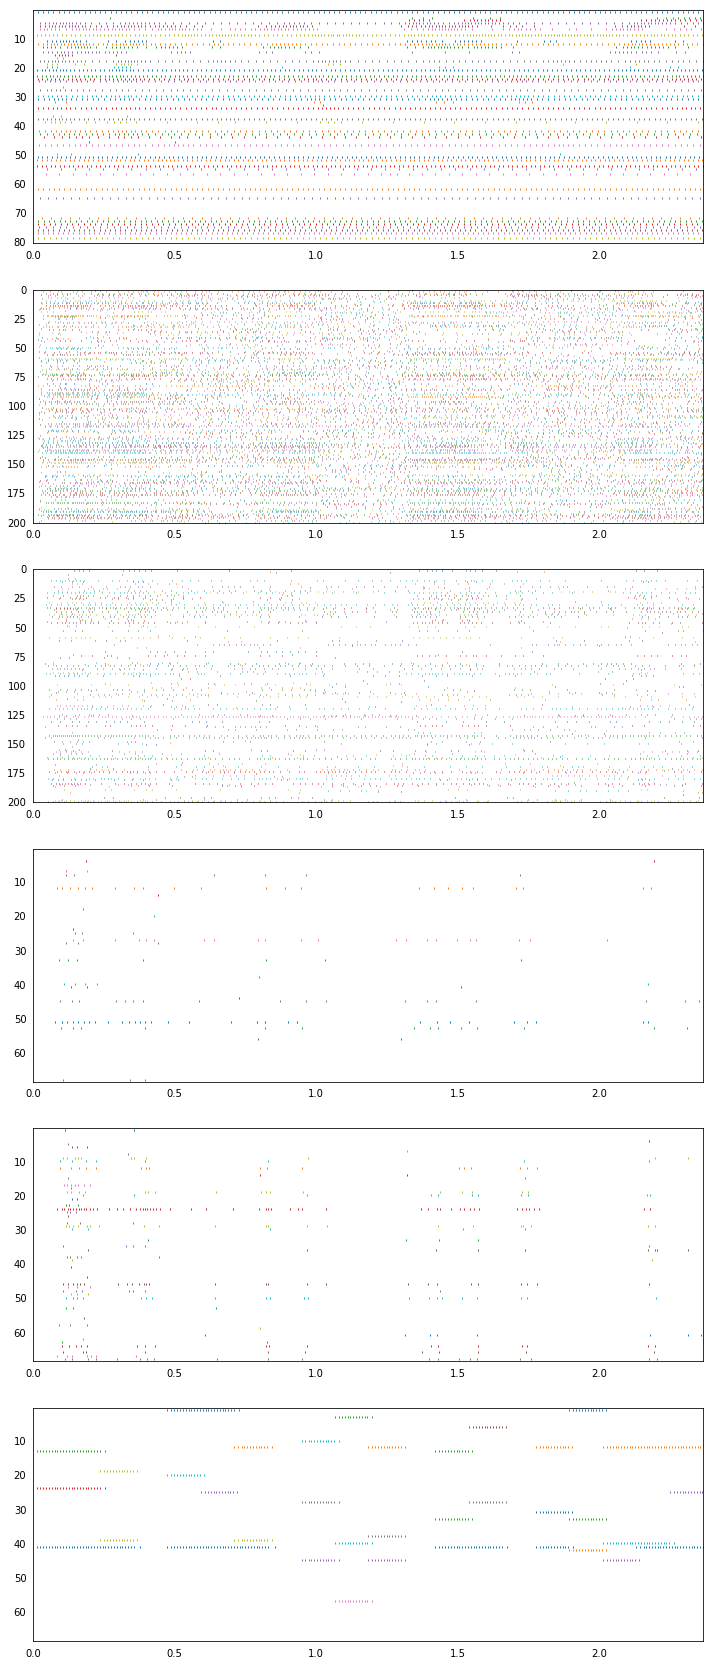

In [63]:
plt.figure(figsize=(12, 30))

plt.subplot(6, 1, 1)
rasterplot(sim.trange(), sim.data[inputNeuron_spike_p])
plt.subplot(6, 1, 2)
rasterplot(sim.trange(), sim.data[hiddenNeuron_spike_p])
plt.subplot(6, 1, 3)
rasterplot(sim.trange(), sim.data[hiddenNeuron_spike_p2])
plt.subplot(6, 1, 4)
rasterplot(sim.trange(), sim.data[hiddenNeuron_spike_p3])
plt.subplot(6, 1, 5)
rasterplot(sim.trange(), sim.data[outputNeuron_spike_p])
plt.subplot(6, 1, 6)
rasterplot(sim.trange(), sim.data[answerNeuron_spike_p])


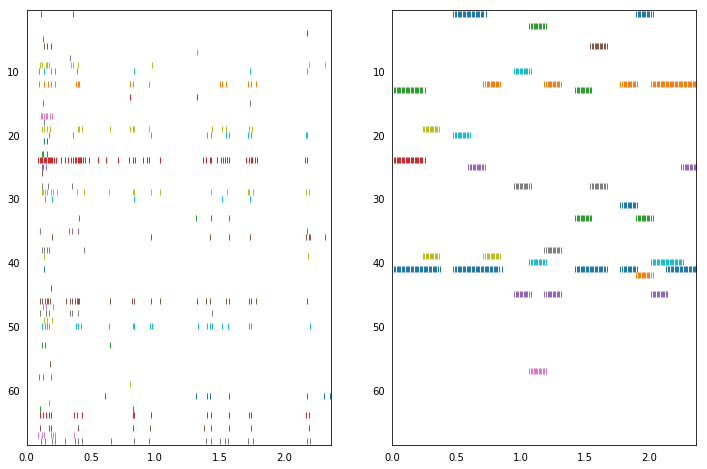

In [64]:
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
rasterplot(sim.trange(), sim.data[outputNeuron_spike_p])
plt.subplot(1, 2, 2)
rasterplot(sim.trange(), sim.data[answerNeuron_spike_p])